# Models utilitzant totes les variables

In [1]:
import pandas as pd

X_train_std = pd.read_csv("./preprocessed_datasets/X_train_std.csv")
X_test_std = pd.read_csv("./preprocessed_datasets/X_test_std.csv")
y_train = pd.read_csv("./preprocessed_datasets/y_train.csv")
y_test = pd.read_csv("./preprocessed_datasets/y_test.csv")

Transformem les dades a arrays

In [2]:
import numpy as np

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Model de regressió lineal

In [3]:
X_train_std = X_train_std.drop(["index", "ID_Zenodo"], axis=1)

X_test_std = X_test_std.drop(["index", "ID_Zenodo"], axis=1)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

lr = LinearRegression(fit_intercept=True).fit(X_train_std ,y_train)
lr_r2_train = r2_score(y_train, lr.predict(X_train_std))
lr_r2_val = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='r2').mean()
lr_r2_test = r2_score(y_test, lr.predict(X_test_std))

In [5]:
print(f"R2 train: {lr_r2_train}")
print(f"R2 val: {lr_r2_val}")
print(f"R2 test: {lr_r2_test}")

R2 train: 0.2744228352231637
R2 val: -5.00025991970037e+24
R2 test: 0.2161179350921716


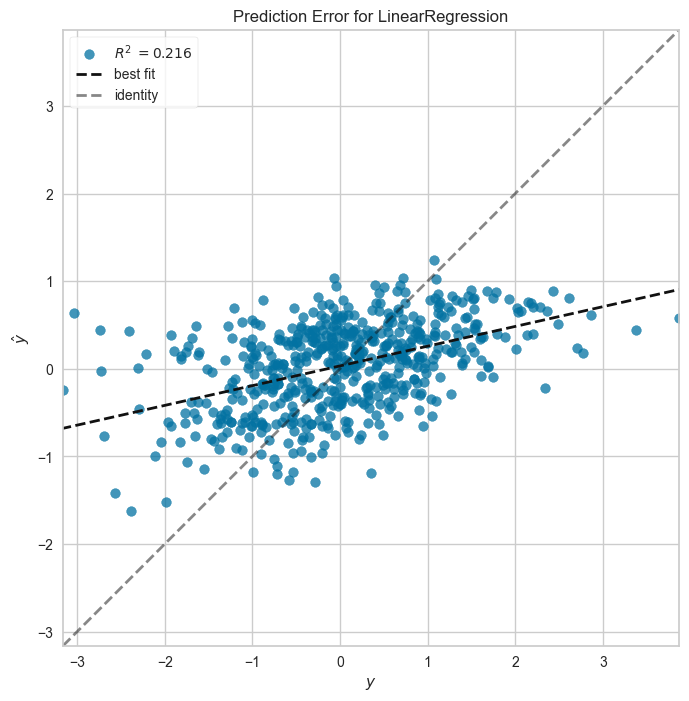

In [6]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test_std, y_test, is_fitted=True)

### Ridge Regression

In [7]:
from sklearn.model_selection import cross_val_score
alpha = [1e-3, 1e-2, 1e-1, 1, 100]
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alpha, scoring="r2", cv=5).fit(X_train_std, y_train)
ridge_r2_test= ridge_cv.score(X_test_std, y_test)
ridge_r2_val = ridge_cv.best_score_
ridge_r2_val2 = np.mean(cross_val_score( RidgeCV(alphas=alpha, scoring="r2", cv=5), X_train_std, y_train, scoring="r2" ))
ridge_r2_train= ridge_cv.score(X_train_std, y_train)

print("Train R2: ", ridge_r2_train)
print("Validation R2: ", ridge_r2_val)
print("Validation R2: ", ridge_r2_val2)

print("Test R2: ", ridge_r2_test)
print(ridge_cv.alpha_)

Train R2:  0.27417151890911196
Validation R2:  0.23423886682480596
Validation R2:  0.23423886682480596
Test R2:  0.21910185810671823
1.0


### Lasso Regression

In [8]:
alpha = [1e-3, 1e-2, 1e-1, 1, 100]
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=0, alphas=alpha).fit(X_train_std, y_train)
lasso_r2_test= lasso_cv.score(X_test_std, y_test)
lasso_r2_val = np.mean(cross_val_score( LassoCV(alphas=alpha, random_state=0, cv=5), X_train_std, y_train, scoring="r2" ))
lasso_r2_train= lasso_cv.score(X_train_std, y_train)

print("Train R2: ", lasso_r2_train)
print("Validation R2: ", lasso_r2_val)
print("Test R2: ", lasso_r2_test)
print(lasso_cv.alpha_)

Train R2:  0.2699338805722008
Validation R2:  0.23455361457833918
Test R2:  0.21641514858959998
0.001


In [9]:
r2_results = pd.DataFrame({'LR': lr_r2_train, 'Ridge': ridge_r2_train, 'Lasso': lasso_r2_train,}, index=['Train R2'])


print([lr_r2_val, ridge_r2_val, lasso_r2_val])
lr_r2_val = np.mean(lr_r2_val)
r2_results.loc['CV (Val) R2', :] = [lr_r2_val, ridge_r2_val, lasso_r2_val]
r2_results.loc['Test R2', :] = [lr_r2_test, ridge_r2_test, lasso_r2_test]


r2_results.loc['lambda','LR']=0
r2_results.loc['lambda','Ridge']=ridge_cv.alpha_
r2_results.loc['lambda','Lasso']=lasso_cv.alpha_
r2_results


[-5.00025991970037e+24, 0.23423886682480596, 0.23455361457833918]


,LR,Ridge,Lasso
Train R2,2.744228e-01,0.274172,0.269934
CV (Val) R2,-5.000260e+24,0.234239,0.234554
Test R2,2.161179e-01,0.219102,0.216415
lambda,0.000000e+00,1.000000,0.001000


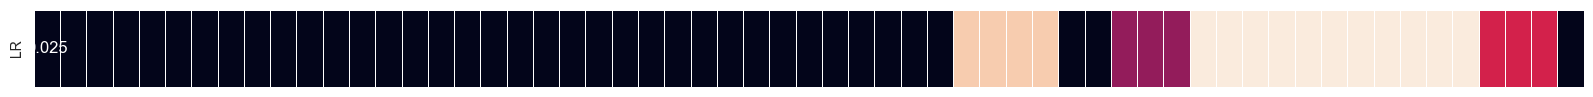

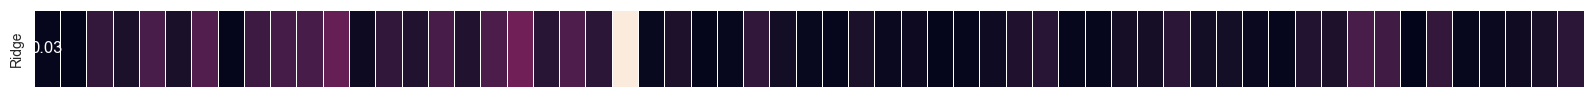

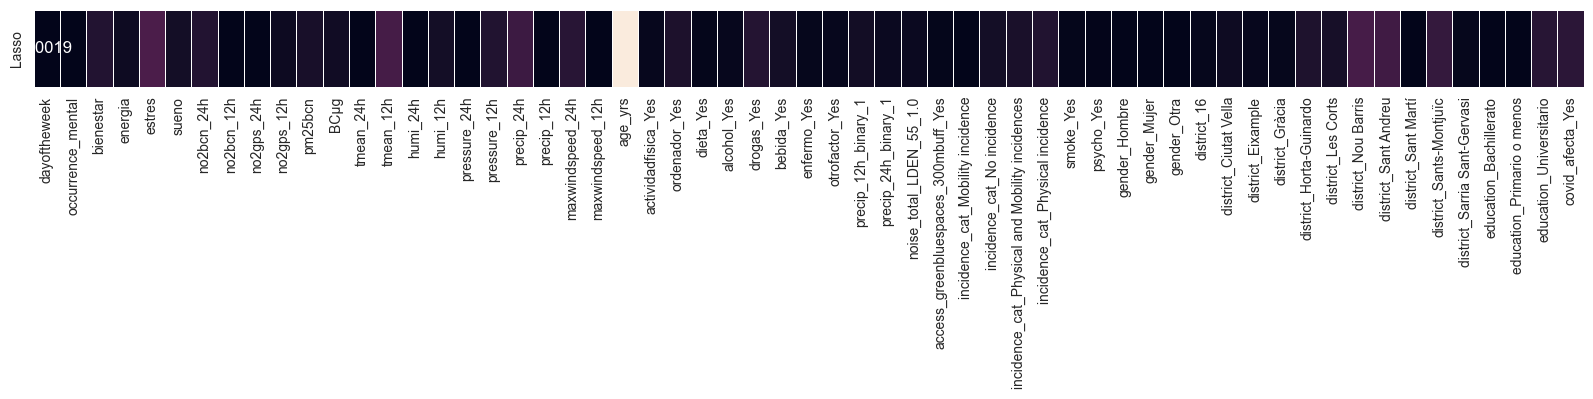

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

weights = pd.DataFrame({'LR':lr.coef_, 'Ridge':ridge_cv.coef_, 'Lasso':lasso_cv.coef_},index=X_train_std.columns)

fig, ax = plt.subplots(figsize = (20,1))
sns.heatmap(weights.T.loc[['LR'],:].abs(), annot=True, linewidths=.5, ax=ax, cbar=False, xticklabels=False);

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['Ridge'],:].abs(), annot=True, linewidths=.5, cbar=False, xticklabels=False);

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['Lasso'],:].abs(), annot=True, linewidths=.5, cbar=False, xticklabels=True);

# MLP (Multi Layer Perceptron)

In [11]:
X_train_std_old = X_train_std.copy()
X_test_std_old = X_test_std.copy()

In [12]:

X_train_std = X_train_std.drop(['district_16',
       'district_Ciutat Vella', 'district_Eixample', 'district_Gràcia',
       'district_Horta-Guinardo', 'district_Les Corts', 'district_Nou Barris',
       'district_Sant Andreu', 'district_Sant Martí',
       'district_Sants-Montjuïc', 'district_Sarria Sant-Gervasi',
       'education_Bachillerato', 'education_Primario o menos',
       'education_Universitario', 'covid_afecta_Yes'], axis=1)
X_test_std = X_test_std.drop(['district_16',
       'district_Ciutat Vella', 'district_Eixample', 'district_Gràcia',
       'district_Horta-Guinardo', 'district_Les Corts', 'district_Nou Barris',
       'district_Sant Andreu', 'district_Sant Martí',
       'district_Sants-Montjuïc', 'district_Sarria Sant-Gervasi',
       'education_Bachillerato', 'education_Primario o menos',
       'education_Universitario', 'covid_afecta_Yes'], axis=1)

## 1a iteració

In [13]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,  Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

callback = EarlyStopping(monitor='loss',patience=3)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_std.shape[1],)),
    Dense(1)
])
# Define the optimizer and learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
callback = EarlyStopping(monitor='val_mean_squared_error',patience=15)

# Train the model
num_epochs = 1000
batch_size = 32
history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

# Evaluate the model
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Training MSE: {:.4f}'.format(train_mse))
print('Testing MSE: {:.4f}'.format(test_mse))
print('Training R-squared: {:.4f}'.format(train_r2))
print('Testing R-squared: {:.4f}'.format(test_r2))



Epoch 1/1000


C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0478 - mean_squared_error: 1.0478 - val_loss: 0.8832 - val_mean_squared_error: 0.8832
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8893 - mean_squared_error: 0.8893 - val_loss: 0.8133 - val_mean_squared_error: 0.8133
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8251 - mean_squared_error: 0.8251 - val_loss: 0.7853 - val_mean_squared_error: 0.7853
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8025 - mean_squared_error: 0.8025 - val_loss: 0.7419 - val_mean_squared_error: 0.7419
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7744 - mean_squared_error: 0.7744 - val_loss: 0.7603 - val_mean_squared_error: 0.7603
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6955 - mean_squared_error: 0.6955 - val_loss: 0.7227 - val_mean_squared_error: 0.7227
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7175 - mean_squared_error: 0.7175 - val_loss: 0.7175 - val_mean

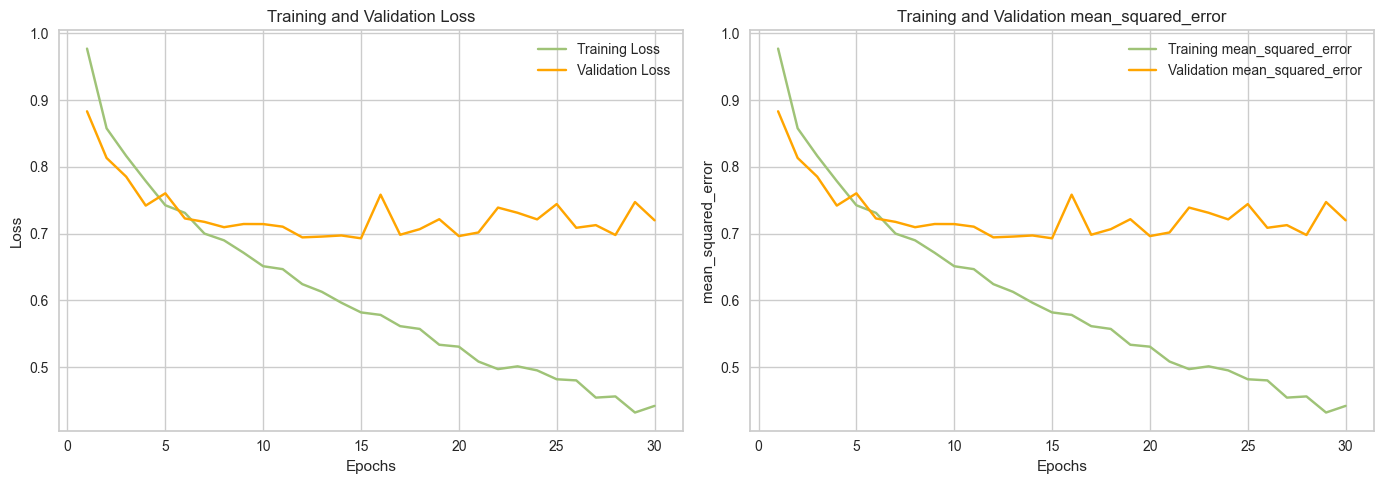

In [14]:
# Plot leaning curves
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['mean_squared_error']
  val_accuracy = history.history['val_mean_squared_error']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training mean_squared_error')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation mean_squared_error')
  axes[1].set_title('Training and Validation mean_squared_error')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('mean_squared_error')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

plot_curves(history)

## 2a iteració

In [17]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,  Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from keras.optimizers import SGD, Adam
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

callback = EarlyStopping(monitor='loss',patience=3)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_std.shape[1],)),
    Dense(256, activation='relu'),
    Dense(1)
])
# Define the optimizer and learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
callback = EarlyStopping(monitor='val_mean_squared_error',patience=15)

# Train the model
num_epochs = 1000
batch_size = 32
history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

# Evaluate the model
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Training MSE: {:.4f}'.format(train_mse))
print('Testing MSE: {:.4f}'.format(test_mse))
print('Training R-squared: {:.4f}'.format(train_r2))
print('Testing R-squared: {:.4f}'.format(test_r2))



Epoch 1/1000


C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9809 - mean_squared_error: 0.9809 - val_loss: 0.7866 - val_mean_squared_error: 0.7866
Epoch 2/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7985 - mean_squared_error: 0.7985 - val_loss: 0.7113 - val_mean_squared_error: 0.7113
Epoch 3/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7215 - mean_squared_error: 0.7215 - val_loss: 0.7686 - val_mean_squared_error: 0.7686
Epoch 4/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7120 - mean_squared_error: 0.7120 - val_loss: 0.7314 - val_mean_squared_error: 0.7314
Epoch 5/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6323 - mean_squared_error: 0.6323 - val_loss: 0.6946 - val_mean_squared_error: 0.6946
Epoch 6/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6562 - mean_squared_error: 0.6562 - val_loss: 0.7113 - val_mean_squared_error: 0.7113
Epoch 7/1000
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5689 - mean_squared_error: 0.5689 - val_loss: 0.8014 - val_mean

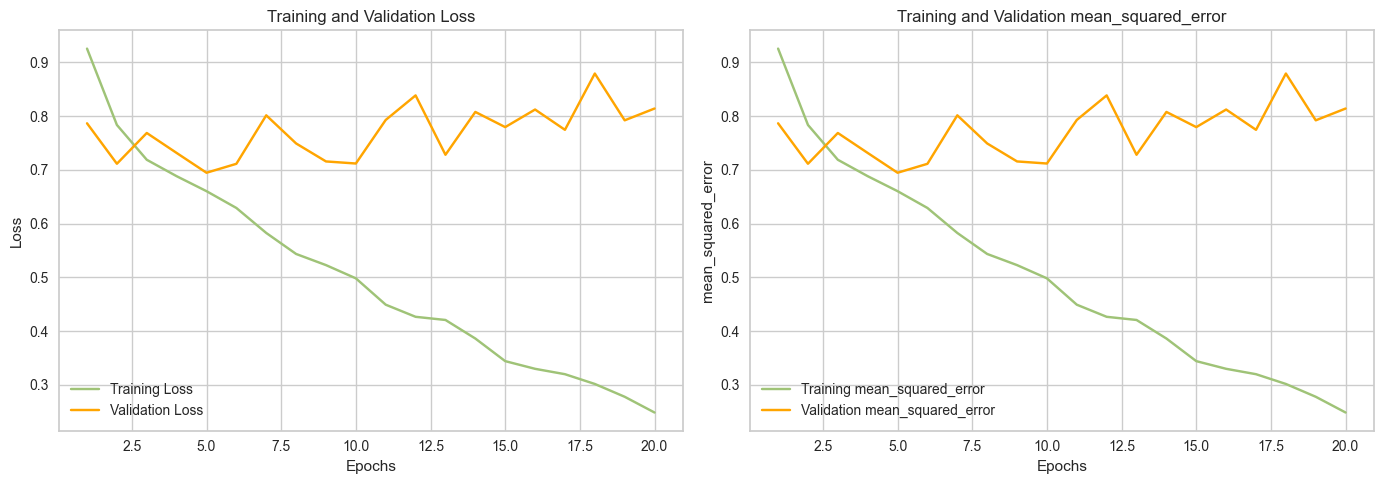

In [18]:
# Plot leaning curves
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['mean_squared_error']
  val_accuracy = history.history['val_mean_squared_error']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training mean_squared_error')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation mean_squared_error')
  axes[1].set_title('Training and Validation mean_squared_error')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('mean_squared_error')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

plot_curves(history)

### Utilitzant MLPRegressor

In [15]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_std, y_train)
regr.score(X_test_std, y_test)

0.03882599941381937